In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from weibull import *
%matplotlib inline

In [2]:
pth = os.getcwd()
behdir = os.path.join(pth, 'pretests 01')
os.listdir(behdir)

['002_c.log',
 '002_c.xls',
 '003a_c.log',
 '003a_c.xls',
 '003_c.log',
 '003_c.xls',
 'readme.txt',
 'weibull_fit_temp.png']

In [3]:
df = pd.read_excel(os.path.join(behdir, '002_c.xls'))
df.head(4)

,time,fixTime,targetTime,SMI,maskTime,opacity,orientation,response,ifcorrect,RT
1,364.147851,81,1,2,20,1.0,90,f,1,1.012841
2,366.507634,75,1,2,20,1.0,135,j,1,0.711520
3,368.504335,81,1,2,20,1.0,135,j,1,0.692330
4,370.532309,138,1,2,20,0.9,90,j,0,0.938961


## Selecting relevant data
We need to select correct contrast range and take into account valid RT's.

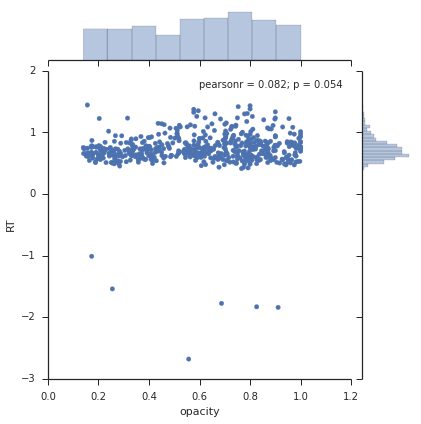

In [4]:
sns.set_style("ticks")
sns.jointplot("opacity", "RT", data=df)

**Whoops**, weibull fit did not work so well...
We'll have to investigate  
**BTW** - I have to fix the late kayboard buffer cleaning, we have some negative RTs...

## inspecting Weibull fitting

#### First - stepwise contrast
First let's just check how stepwise - that is first 35 trials works...

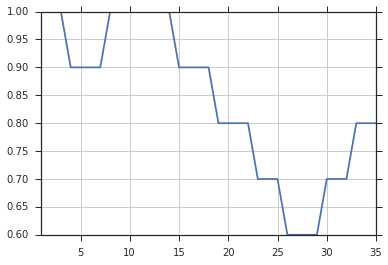

In [5]:
df.loc[1:35,'opacity'].plot()

### First weibull fit
First weibull fit is performed after 45 trials.  
But the rule of how many trials to take is:  
`min([i-15, 60])`  
where `i` is the current trial.

In [6]:
# trials 1 - 60
current_trial = 45
take_last = min([current_trial-15, 60])
idx = np.array(np.arange(current_trial-take_last+1, 
                         current_trial+1), dtype = 'int')
idx

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

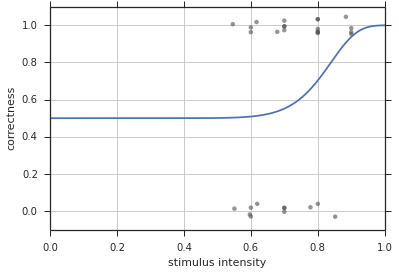

In [7]:
w = fitw(df, idx)
w.plot()

In [8]:
# This looks ok and it also looks good in the logs
# But the Weibull slowly starts to lay flat:
logs = '''
528.6190 	WARNING 	Weibull params:  18.7963480413 0.841270001797
528.6190 	WARNING 	Contrast limits set to:  0.76103515625 - 0.87978515625
578.5423 	WARNING 	Weibull params:  9.22088411376 0.782814143805
578.5423 	WARNING 	Contrast limits set to:  0.63818359375 - 0.85771484375
621.1924 	WARNING 	Weibull params:  8.15590745724 0.786164566541
621.1924 	WARNING 	Contrast limits set to:  0.6240234375 - 0.8716796875
657.7038 	WARNING 	Weibull params:  4.11669179003 0.904373296702
657.7038 	WARNING 	Contrast limits set to:  0.572265625 - 1.109765625
657.7038 	WARNING 	Opacity limits corrected to:  0.572265625 - 1.0
691.8962 	WARNING 	Weibull params:  2.8046422685 1.00986429453
691.8962 	WARNING 	Contrast limits set to:  0.51591796875 - 1.363671875
691.8962 	WARNING 	Opacity limits corrected to:  0.51591796875 - 1.0
729.0445 	WARNING 	Weibull params:  1.10431671132 0.767949774827
729.0445 	WARNING 	Contrast limits set to:  0.139453125 - 1.64677734375
729.0445 	WARNING 	Opacity limits corrected to:  0.139453125 - 1.0
'''

# the params now seem to be different though...
w.params

array([ 11.72454782,   0.81984332])

#### Fit 2

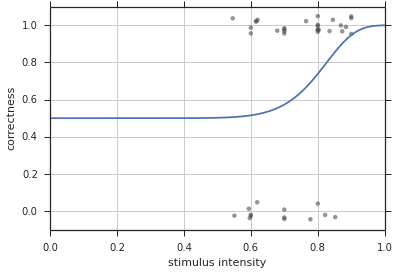

In [9]:
# let's look at weibull fit no. 2
w = wfit_at(df, 2)
w.plot()

#### Fit 3

array([ 11.18171312,   0.80619885])

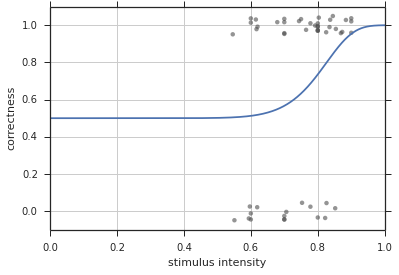

In [10]:
# 2 looks ok, what about 3?
w = wfit_at(df, 3)
w.plot()
w.params

#### Fit 4

array([ 6.84316408,  0.8133825 ])

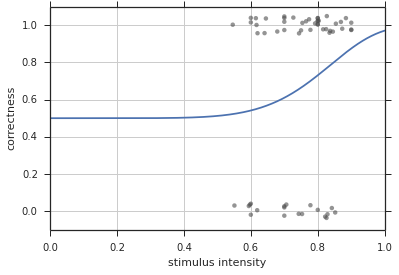

In [11]:
w = wfit_at(df, 4)
w.plot()
w.params

#### Fit 5

array([ 7.38745215,  0.85943552])

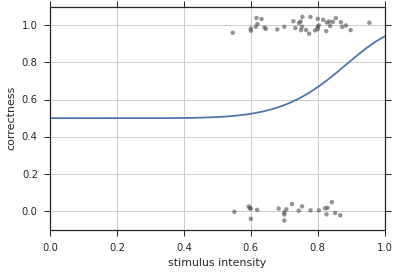

In [12]:
w = wfit_at(df, 5)
w.plot()
w.params

#### Fit 6

array([ 2.47083899,  0.94887513])

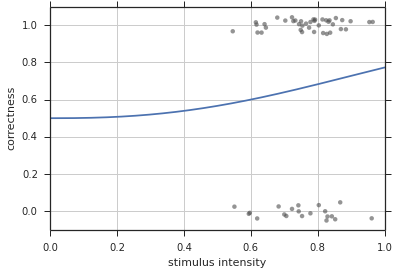

In [13]:
w = wfit_at(df, 6)
w.plot()
w.params

In [14]:
# This is not so good, seems like not enough incorr trials?
idx = idx_at(6)
df.loc[idx, 'ifcorrect'].mean()

0.66666666666666663

array([ 2.48650956,  0.94303081])

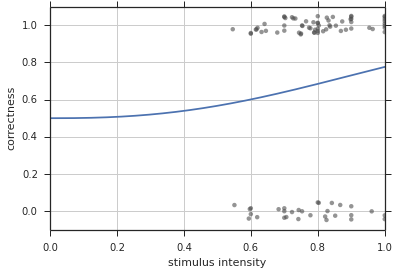

In [15]:
# Let's compare to all trials:
idx2 = np.r_[1:idx[-1]]
w = fitw(df, idx2)
w.plot()
w.params

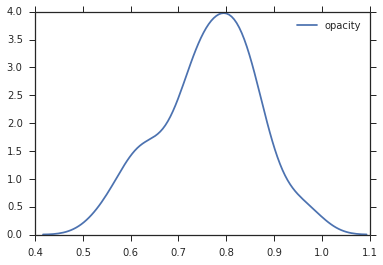

In [16]:
# Maybe not necessarily too little incorr, but contrast unequally probed...
sns.kdeplot(df.loc[idx, 'opacity'])

### Looking at later trials (after Weibull fit, the actual proc)

array([ 1.93101974,  0.90579841])

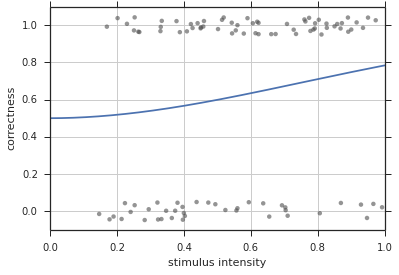

In [17]:
idx = np.r_[100:200]
w = fitw(df, idx)
w.plot()
w.params

array([  1.55141445e-02,   2.85068413e+04])

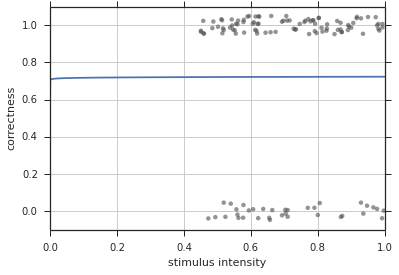

In [18]:
# trials 100 - 300, only contrast above 0.45
idx = np.r_[100:300]
idxT, = np.where(df.loc[idx, 'opacity'] > 0.45)
w = fitw(df, idx[idxT])
w.plot()
w.params

In [19]:
df.loc[100:105,]

,time,fixTime,targetTime,SMI,maskTime,opacity,orientation,response,ifcorrect,RT
100,726.506361,173,1,2,20,0.763,135,j,1,0.784151
101,732.497013,128,1,2,20,0.524,135,f,0,1.089189
102,735.398274,81,1,2,20,0.735,0,f,1,0.953542
103,737.691453,209,1,2,20,0.330,0,f,1,0.893350
104,741.201438,92,1,2,20,0.929,45,f,0,1.088124
105,743.744211,171,1,2,20,0.811,90,f,1,1.052405


array([ 1.09223862,  0.93817847])

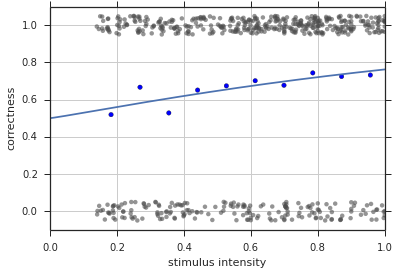

In [20]:
idx = np.r_[1:560]
w = fitw(df, idx)
w.plot()

# add mean points
opord = pd.cut(df.loc[:, 'opacity'], 10)
meanpoints = df.groupby(opord)['ifcorrect'].mean()
idx_fun = lambda x: np.mean(map(float, x[1:-1].split(', ')))
x = np.array(map(idx_fun, meanpoints.index))
y = meanpoints.values
plt.scatter(x, y)

w.params

Actually it looks that for this participant the psychometric function is almost linear so I would consider weibull fit successful in this particular case. The strange behavior may be due to the strategy adopted by the participant - relying on the feeling of fixation cross movement. This was because fixation cross was cardinal, and so cardinal gabors were more difficult to see. This has been corrected, now fixation cross is a fixation dot.

### Another subject - part 01 - problems with fit criteria

In [21]:
df = pd.read_excel(os.path.join(behdir, '003a_c.xls'))
df.head(4)

,time,fixTime,targetTime,SMI,maskTime,opacity,orientation,response,ifcorrect,RT
1,681.843731,96,1,2,20,1.0,90,j,1,0.706633
2,684.042997,223,1,2,20,1.0,0,j,1,0.653013
3,687.459338,130,1,2,20,1.0,135,f,1,0.481279
4,689.768134,147,1,2,20,0.9,90,j,1,0.599813


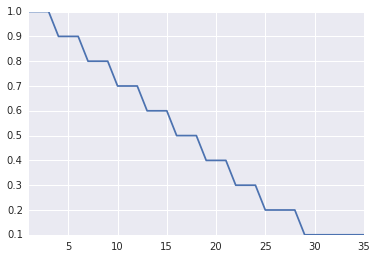

In [22]:
sns.set_style('darkgrid')
df.loc[1:35, 'opacity'].plot()

In [23]:
df[85:92]

,time,fixTime,targetTime,SMI,maskTime,opacity,orientation,response,ifcorrect,RT
86,1026.569961,215,1,2,20,0.6,135,f,1,0.558203
87,1029.814756,105,1,2,20,0.6,0,j,1,0.664761
88,1032.061000,199,1,2,20,0.6,90,j,1,0.795085
89,1035.368170,116,1,2,20,0.6,0,j,1,0.777537
90,1037.833087,157,1,2,20,0.6,0,j,1,0.617869
91,NaN,220,1,2,20,NaN,0,NaN,NaN,NaN
92,NaN,178,1,2,20,NaN,45,NaN,NaN,NaN


The procedure was stopped at 90th trial because the contrast was stuck at 0.6  
I will be checking below why the fit went so bad...

In [24]:
df = df[:90]
df.tail()

,time,fixTime,targetTime,SMI,maskTime,opacity,orientation,response,ifcorrect,RT
86,1026.569961,215,1,2,20,0.6,135,f,1,0.558203
87,1029.814756,105,1,2,20,0.6,0,j,1,0.664761
88,1032.061000,199,1,2,20,0.6,90,j,1,0.795085
89,1035.368170,116,1,2,20,0.6,0,j,1,0.777537
90,1037.833087,157,1,2,20,0.6,0,j,1,0.617869


In [25]:
tm = df.time[-1:].values[0] / 60
print '90th trial was after {} minutes'.format(tm)

90th trial was after 17.2972181092 minutes


array([ 4.62676516,  0.21198046])

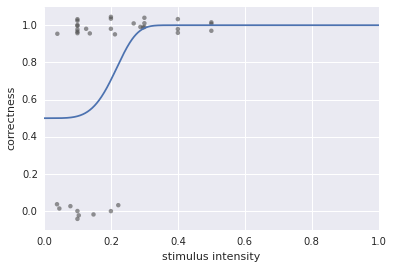

In [26]:
w = fit_weibull(df, 50)
w.plot()
w.params

In [27]:
# why would this give strange contrast limits?
w._dist2corr([0.55, 0.9])

[0.14109949558786214, 0.25429375055770276]

#### Inspecting fit steps

Weibull params: [ 5.4448372   0.28938124]
contrast range: [0.20477113761776039, 0.33781868328494402]


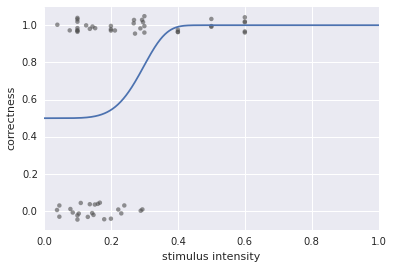

In [28]:
w = wfit_at(df, 4)
w.plot()
contrast_range = w._dist2corr([0.55, 0.9])
print 'Weibull params: {}\ncontrast range: {}'.format(w.params, contrast_range)

## Checking new fitting approach

In [29]:
# the last recorded data
df = pd.read_excel(os.path.join(behdir, '003_c.xls'))
df.head(4)

,time,fixTime,targetTime,SMI,maskTime,opacity,orientation,response,ifcorrect,RT
1,40.122632,229,1,2,20,1,0,j,1,0.643442
2,43.593770,106,1,2,20,1,135,f,1,0.642077
3,45.824697,166,1,2,20,1,45,j,0,0.562800
4,48.585738,235,1,2,20,1,0,j,1,0.550639


Weibull params: [ 2.89240288  0.17663978]
contrast range: [0.091999999999999998, 0.14000000000000001, 0.185, 0.23599999999999999]


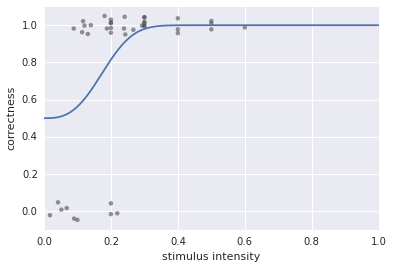

In [31]:
w = wfit_at(df, 2)
w.plot()
contrast_steps = w._dist2corr([0.55, 0.65, 0.775, 0.9])
contrast_steps = [np.round(x, decimals=3) for x in contrast_steps]
print 'Weibull params: {}\ncontrast range: {}'.format(w.params, contrast_steps)